In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Reading the data.
har_data = pd.read_csv("C:/Users/mohit/OneDrive/Desktop/ML Project/har.csv")

In [3]:
har_data.shape

(10299, 563)

In [4]:
har_data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  \
0         -0.923527         -0.934724         -0.567378         -0.744413   
1         -0.957686         -0.943068         -0.557851         -0.818409   
2         -0.977469         -0.938692         -0.557851         -0.818409   
3         -0.989302         -0.938692         -0.576159         -0.829711   
4         -0.990441         -0.942469         -0.569174         -0.824705   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  \
0          0.852947          0.685845          0.814263       -0.965523   
1          0.849308          0.685845          0.822637       -0.981930   
2          0.843609          0.682401          0.839344       -0.983478   
3          0.843609          0.682401          0.837869       -0.986093   
4          0.849095          0.683250          0.837869       -0.992653   

   tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  \
0            -0.999945            -0.999863            -0.994612   
1            -0.999991            -0.999788            -0.998405   
2            -0.999969            -0.999660            -0.999470   
3            -0.999976            -0.999736            -0.999504   
4            -0.999991            -0.999856            -0.999757   

   tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  \
0         -0.994231         -0.987614         -0.943220             -0.407747   
1         -0.999150         -0.977866         -0.948225             -0.714892   
2         -0.997130         -0.964810         -0.974675             -0.592235   
3         -0.997180         -0.983799         -0.986007             -0.627446   
4         -0.998004         -0.981232         -0.991325             -0.786553   

   tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  \
0             -0.679338             -0.602122                0.929294   
1             -0.500930             -0.570979                0.611627   
2             -0.485821             -0.570979                0.273025   
3             -0.850930             -0.911872                0.061436   
4             -0.559477             -0.761434                0.313276   

   tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  \
0               -0.853011                0.359910               -0.058526   
1               -0.329549                0.284213                0.284595   
2               -0.086309                0.337202               -0.164739   
3                0.074840                0.198204               -0.264307   
4               -0.131208                0.191161                0.086904   

   tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  \
0                0.256892               -0.224848                0.264106   
1                0.115705               -0.090963                0.294310   
2                0.017150               -0.074507                0.342256   
3                0.072545              

In [5]:
har_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.992360         -0.976990         -0.979137         -0.993293   
50%           -0.943030         -0.835032         -0.850773         -0.948244   
75%           -0.250293         -0.057336         -0.278737         -0.302033   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.525697         -0.614989         -0.466732         -0.305180   
std            0.484201          0.399034          0.538707          0.279920   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.977017         -0.979064         -0.935788         -0.562570   
50%           -0.843670         -0.845068         -0.874825         -0.468206   
75%           -0.087405         -0.288149         -0.014641         -0.067345   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.562230          0.525304          0.389537          0.598022   
std            0.282991          0.356589          0.338844          0.290615   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.812194          0.212530          0.113900          0.392717   
50%           -0.724503          0.784233          0.619774          0.772226   
75%           -0.345591          0.843793          0.685194          0.836742   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
count    10299.000000         10299.000000         10299.000000   
mean        -0.552087            -0.825460            -0.902704   
std          0.461375             0.247052             0.125988   
min         -1.000000            -1.000000            -1.000000   
25%         -0.981706            -0.999929            -0.999771   
50%         -0.876947            -0.997736            -0.992909   
75%         -0.122829            -0.715745            -0.825149   
max          1.000000             1.000000             1.000000   

       tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
count         10299.000000      10299.000000      10299.000000   
mean             -0.854662         -0.689162         -0.643512   
std               0.205998          0.359209          0.368865   
min              -1.000000         -1.000000         -1.000000   
25%              -0.999414         -0.994185         -0.981327   
50%              -0.984240         -0.955999         -0.884947   
75%              -0.759473         -0.407902         -0.324653   
max               1.000000          1.000000          1.000000   

       tBodyAcc-iqr()-Z

In [6]:
#Checking dublicates
print("number of duplicates = " + str(har_data.duplicated().sum()))

number of duplicates = 0


In [7]:
#Checking missing values
print(har_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


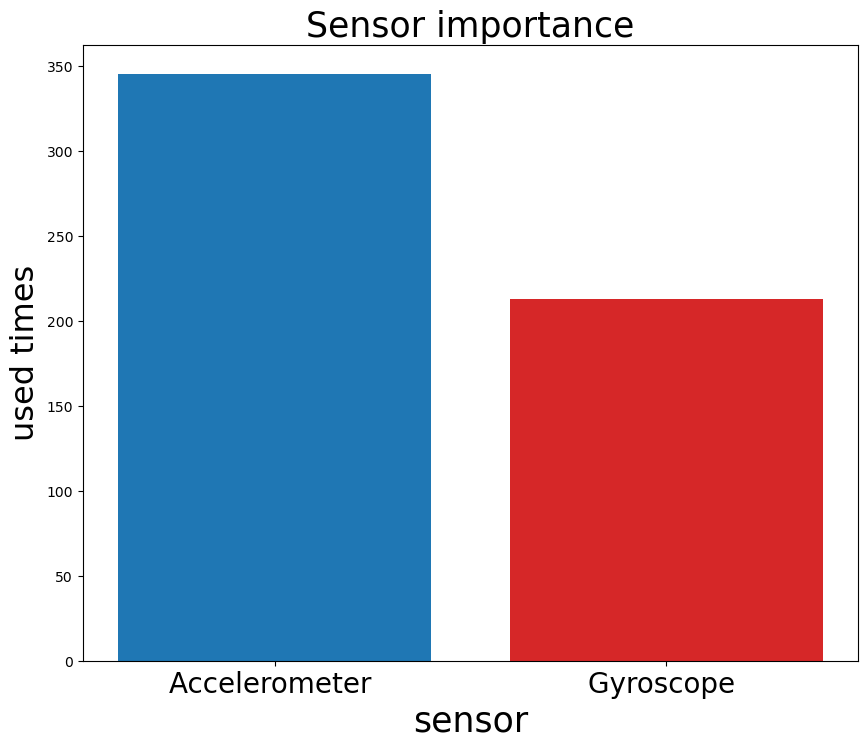

In [8]:
#Exploratory Data Analysis
Acc=0
Gyro=0
other=0 
for i in har_data.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.show()

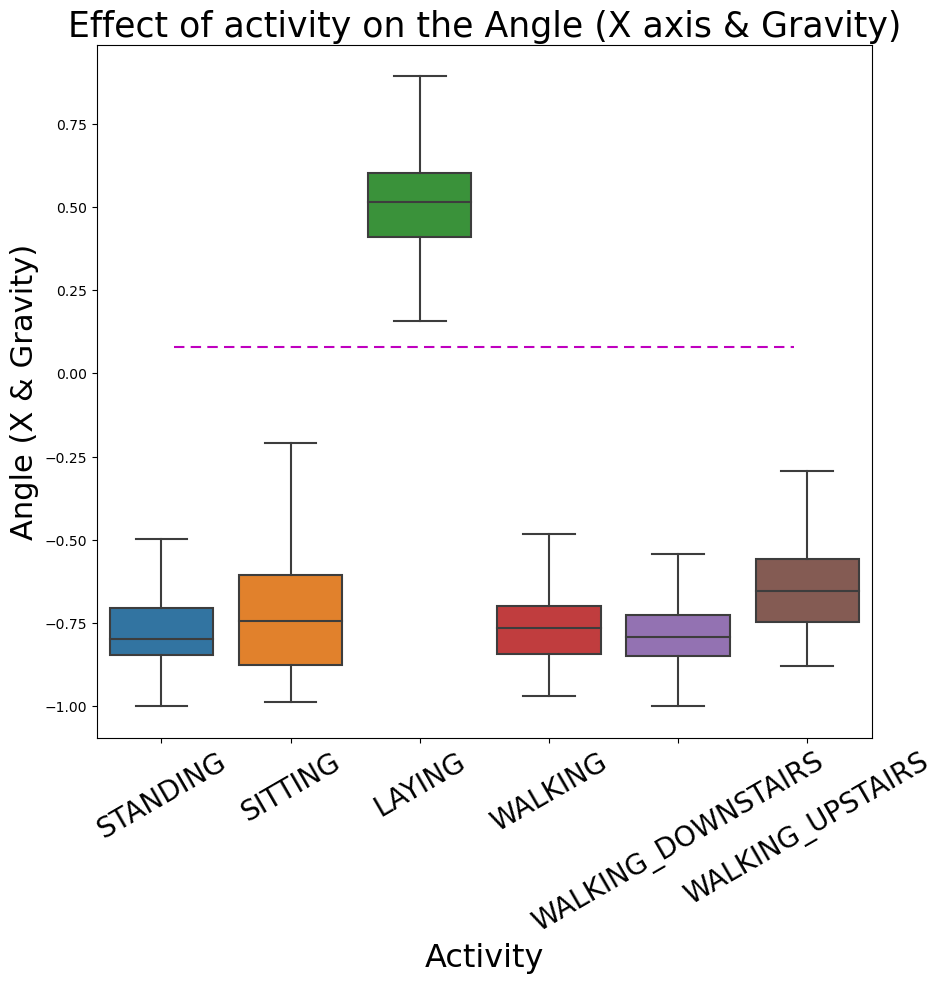

In [9]:
#Exploring angle between x and gravity
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=har_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()

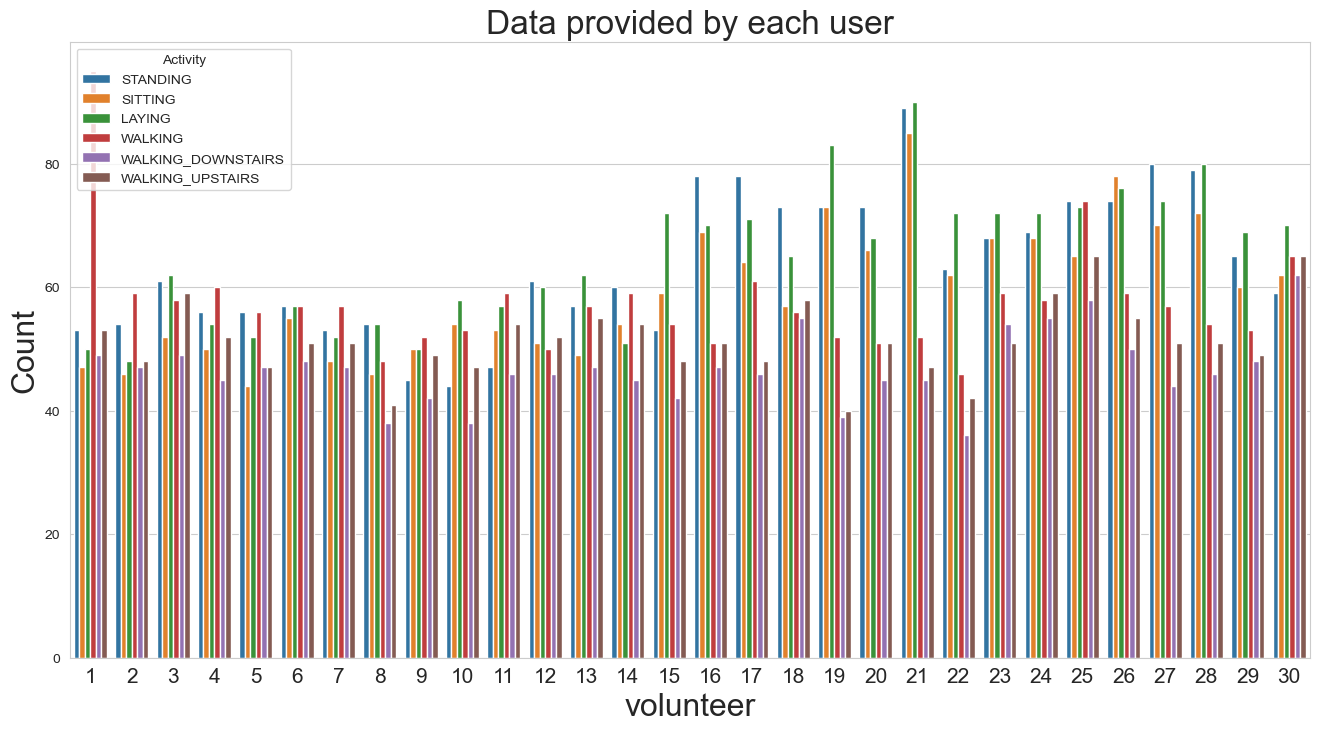

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.color_palette("tab10")
plt.title('Data provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = har_data)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

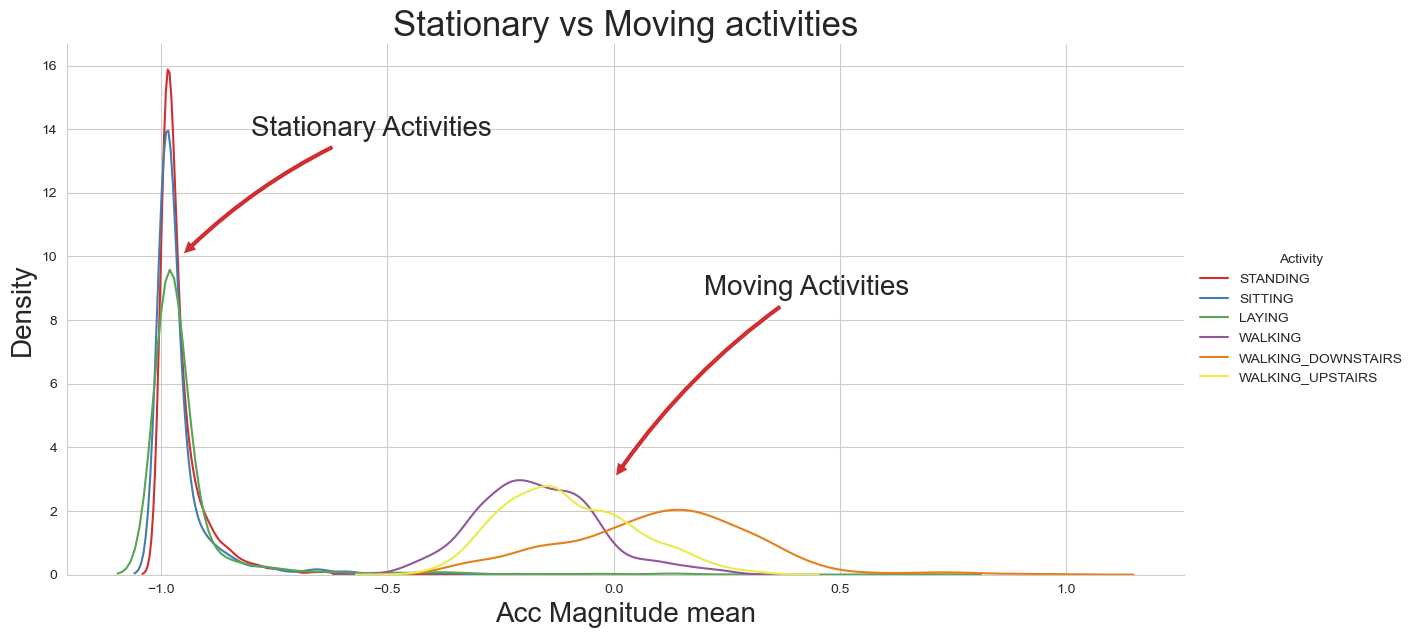

In [11]:
#Visualizing distribution of Stationary and Moving activities
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(har_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

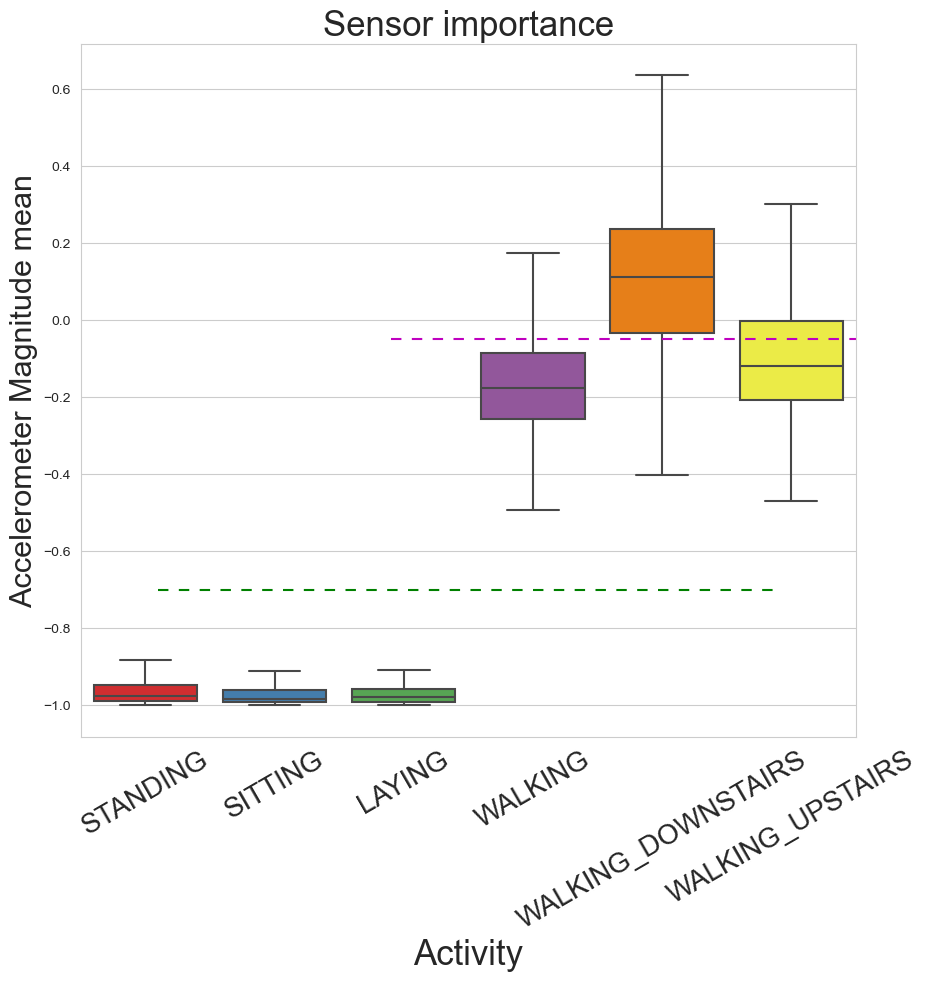

In [12]:
# classifying activities into static ❌ dynamic
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=har_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

In [13]:
# checking imbalance
fig = px.pie(har_data, names='Activity',width=980)
fig.update_layout(
    title={
        'text': "Activities Distribution",
        'y':0.95,
        'x':0.40,
        'xanchor': 'center',
        'yanchor': 'top'},
         legend_title ="Activities",
         font=dict(
         family="Arial",
         size=18))
fig.show()

In [14]:
columns = har_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

har_data.columns = columns

(10299, 157)
for most imp features
Original number of features 561 Reduced number of features 157


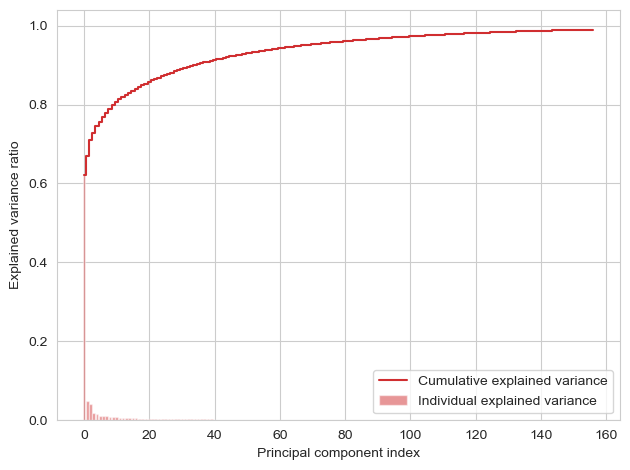

(2060, 561)


In [15]:
# Principal Component Analysis

har_data = har_data.sample(frac=1)

X = har_data.drop(['subject', 'Activity'], axis=1)
y = har_data['Activity']

pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

# x_df = pd.DataFrame(x_reduced)

print(x_reduced.shape)
print("for most imp features")

print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
# plt.figure(figsize=(30, 20))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Bhargavi - changing to x_reduced from X from the below first line
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(x_test.shape)

In [16]:
# Modeling

kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
#     print("-------------")
#     print(name)
#     print(x_train.shape)
#     print(x_test.shape)
#     print(y_train.shape)
#     print(y_test.shape)
#     print("-------------")
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    train_F1 = metrics.f1_score(y_train, model.predict(X_train), average='micro')
    test_F1 = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall,train_F1,test_F1]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    print("Training F1-Score " + str(name) + " {}  Test F1-Score ".format(train_F1*100) + str(name) + " {}".format(test_F1*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression 98.85908484039325  Test Accuracy Logistic Regression 98.15533980582525
Training Precesion Logistic Regression 98.85908484039325  Test Precesion Logistic Regression 98.15533980582525
Training Recall Logistic Regression 98.85908484039325  Test Recall Logistic Regression 98.15533980582525
Training F1-Score Logistic Regression 98.85908484039325  Test F1-Score Logistic Regression 98.15533980582525


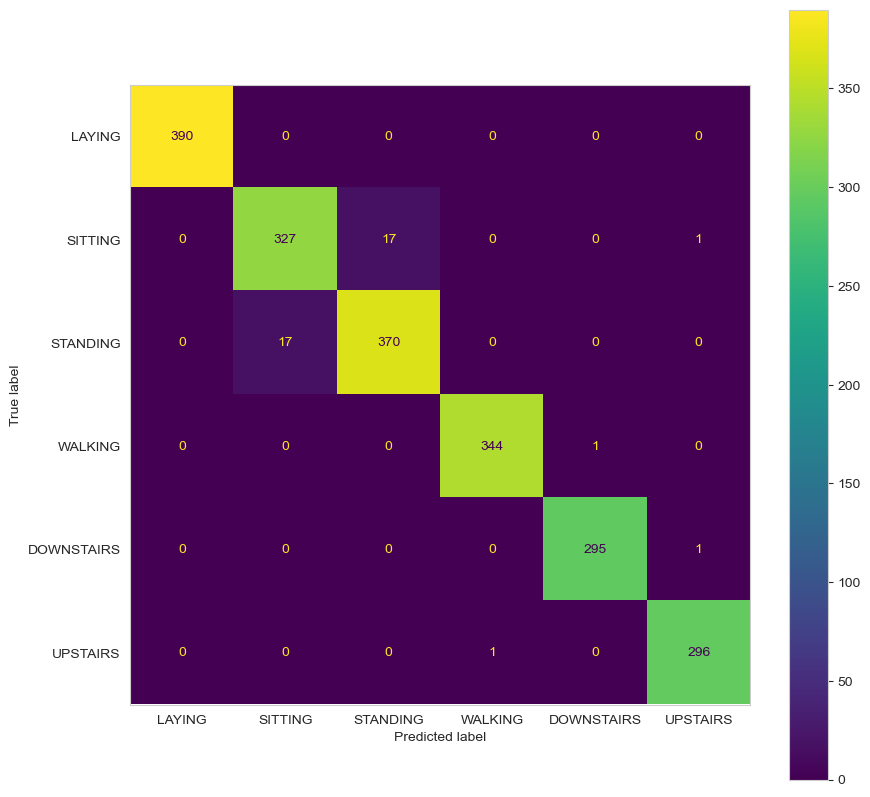

In [17]:
#  1. Logistic Regression
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy KNeighborsClassifier 95.42420196625804  Test Accuracy KNeighborsClassifier 95.0
Training Precesion KNeighborsClassifier 95.42420196625804  Test Precesion KNeighborsClassifier 95.0
Training Recall KNeighborsClassifier 95.42420196625804  Test Recall KNeighborsClassifier 95.0
Training F1-Score KNeighborsClassifier 95.42420196625804  Test F1-Score KNeighborsClassifier 95.0


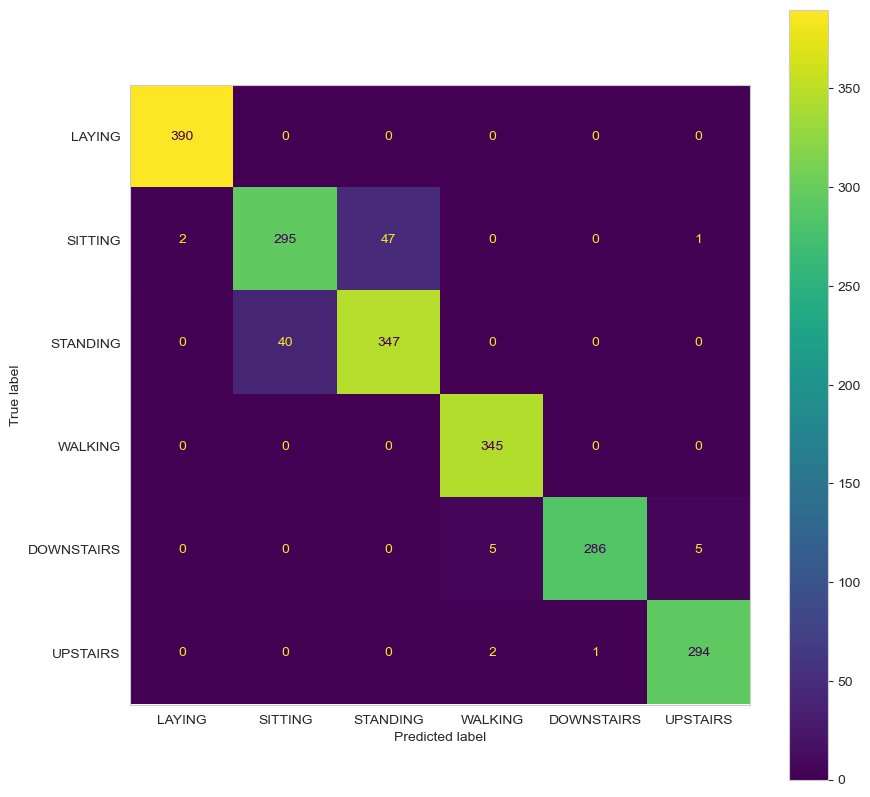

In [18]:
# 2. k-nearest neighbors

knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy GaussianNB 71.9990290083748  Test Accuracy GaussianNB 71.26213592233009
Training Precesion GaussianNB 71.9990290083748  Test Precesion GaussianNB 71.26213592233009
Training Recall GaussianNB 71.9990290083748  Test Recall GaussianNB 71.26213592233009
Training F1-Score GaussianNB 71.99902900837482  Test F1-Score GaussianNB 71.26213592233009


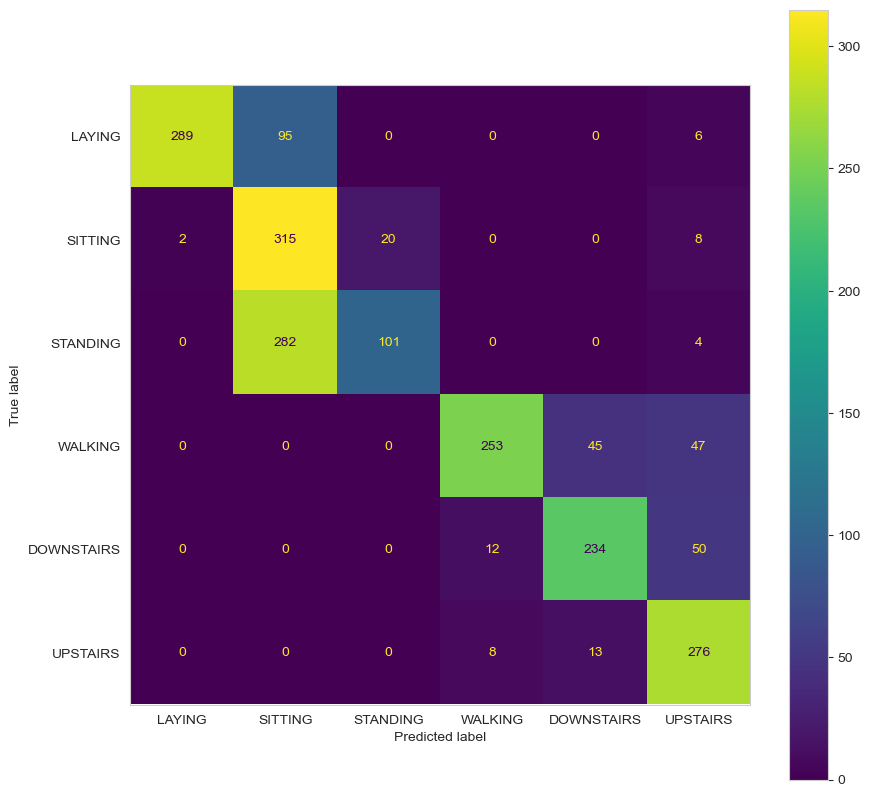

In [19]:
# 3. Naive Bayes
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

Training Accuracy Linear SVC(LBasedImpl) 99.41740502488166  Test Accuracy Linear SVC(LBasedImpl) 98.3495145631068
Training Precesion Linear SVC(LBasedImpl) 99.41740502488166  Test Precesion Linear SVC(LBasedImpl) 98.3495145631068
Training Recall Linear SVC(LBasedImpl) 99.41740502488166  Test Recall Linear SVC(LBasedImpl) 98.3495145631068
Training F1-Score Linear SVC(LBasedImpl) 99.41740502488166  Test F1-Score Linear SVC(LBasedImpl) 98.3495145631068


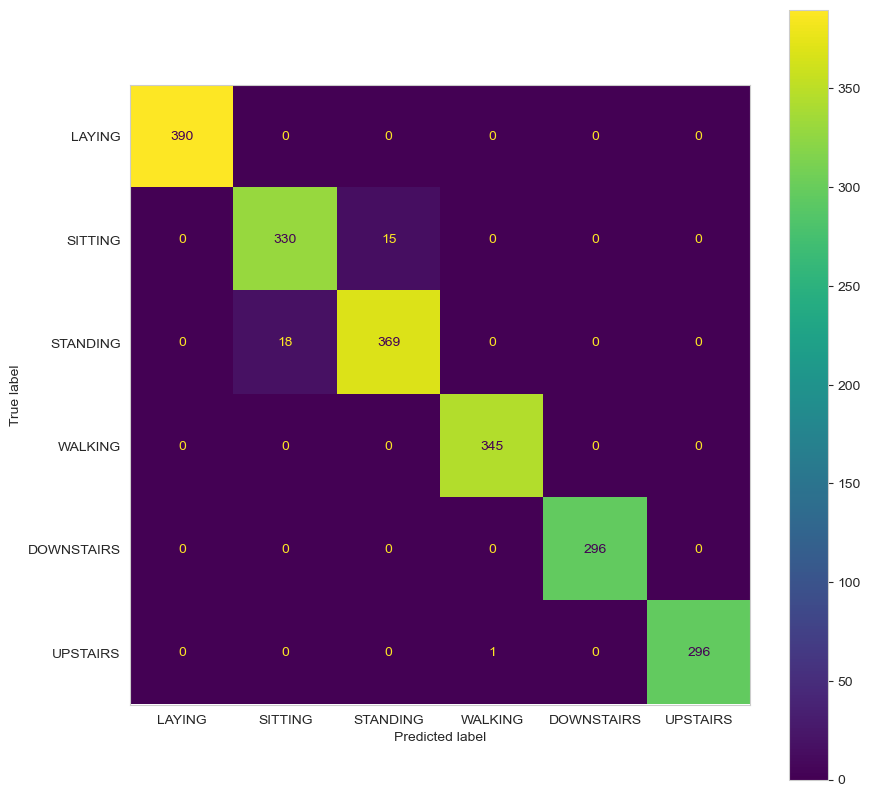

In [20]:
# 4. Support Vector Machines
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 93.83495145631068
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 93.83495145631068
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 93.83495145631068
Training F1-Score DecisionTreeClassifier 100.0  Test F1-Score DecisionTreeClassifier 93.83495145631068


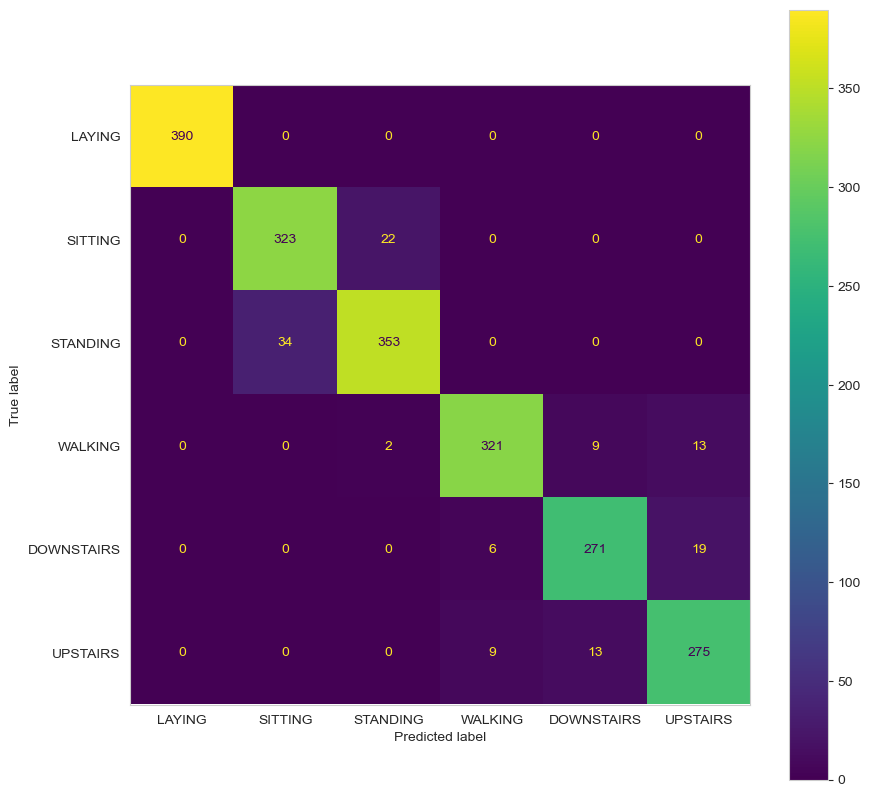

In [21]:
# 5. Decision Tree
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

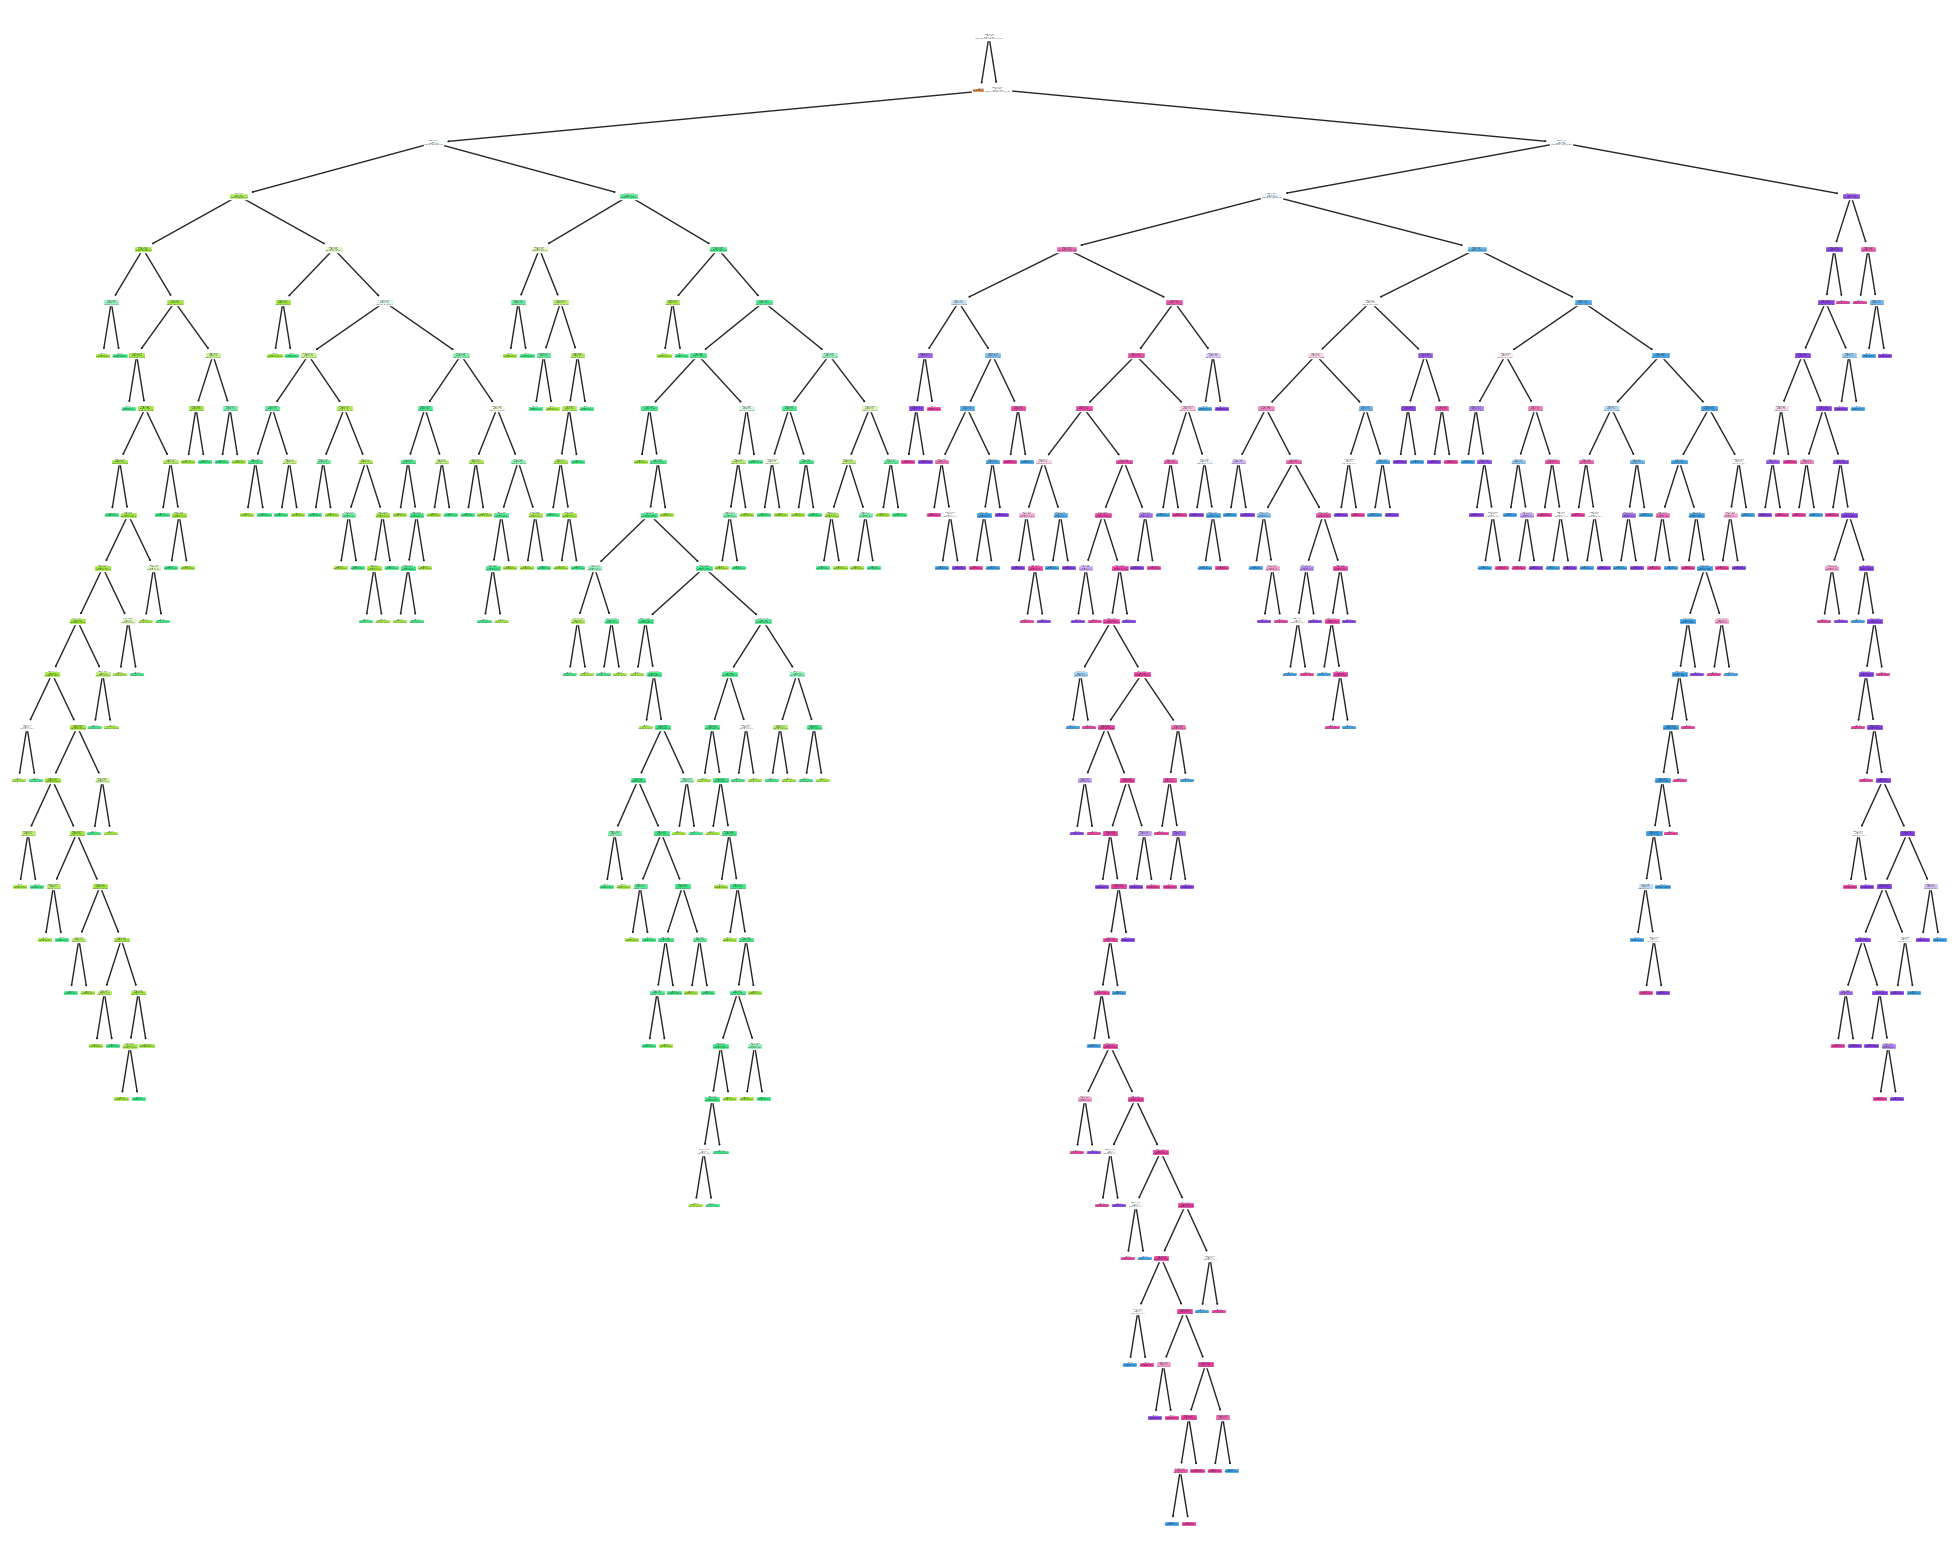

In [22]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tdt , filled=True)
plt.show()

<AxesSubplot:title={'center':'10 Most Important Features'}>

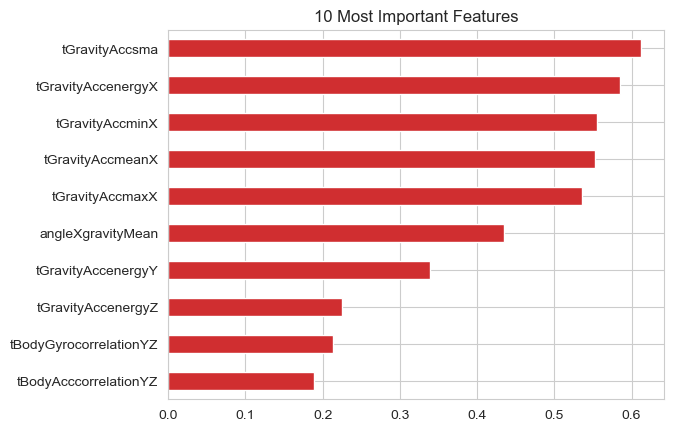

In [23]:
# 10 Most important features
from sklearn import svm
svm = svm.SVC(gamma=0.001, C=100., kernel = 'linear')
feature_weights = lin_svc.coef_[0]
pd.Series(abs(feature_weights), index=X.columns).nlargest(10).sort_values(ascending=True).plot(kind='barh',title='10 Most Important Features')

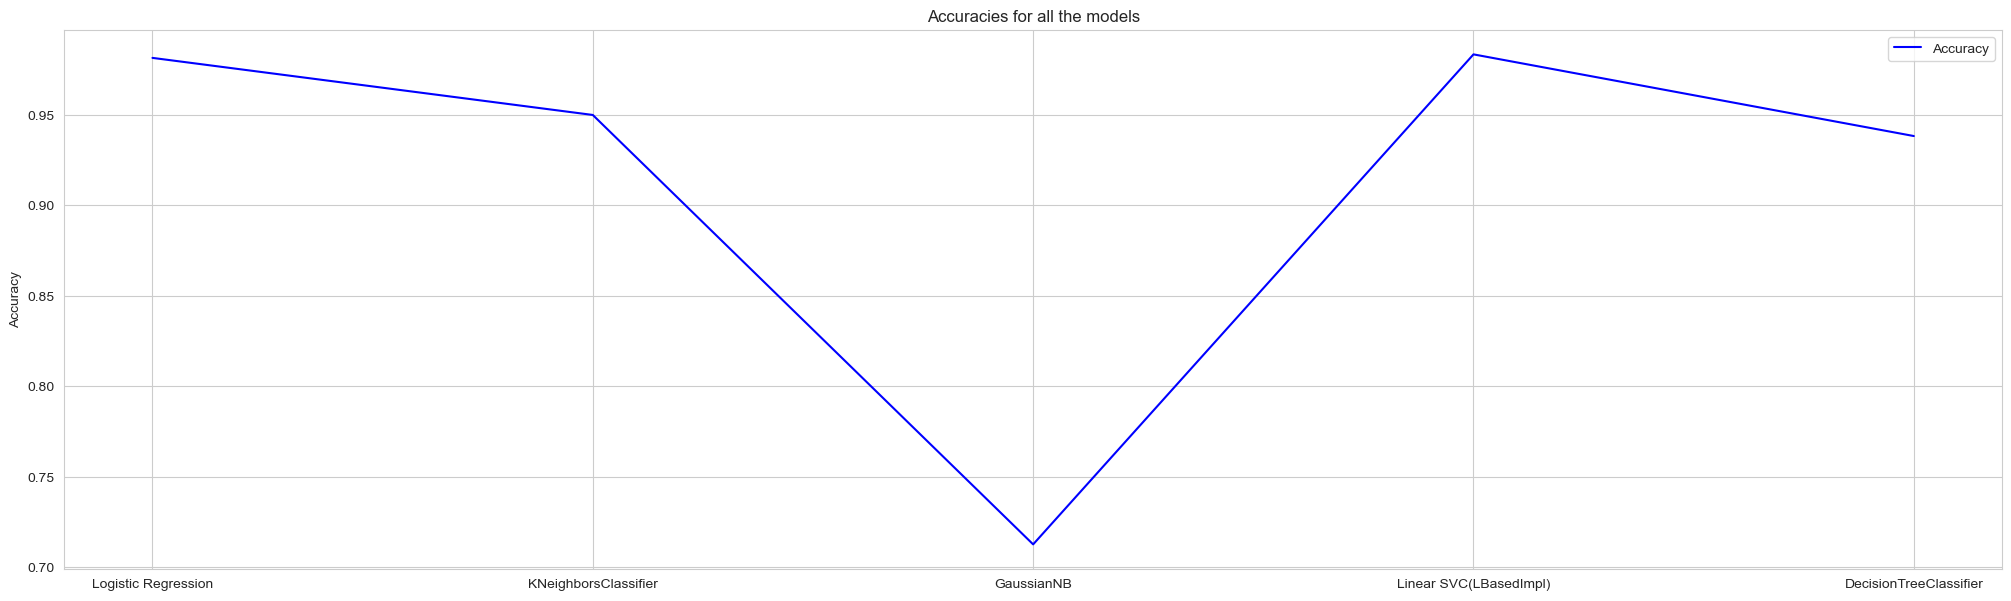

In [24]:
# To print all accuracy values in 1 graph
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(25, 7))
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Accuracy", "Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.title("Accuracies for all the models")
plt.show()

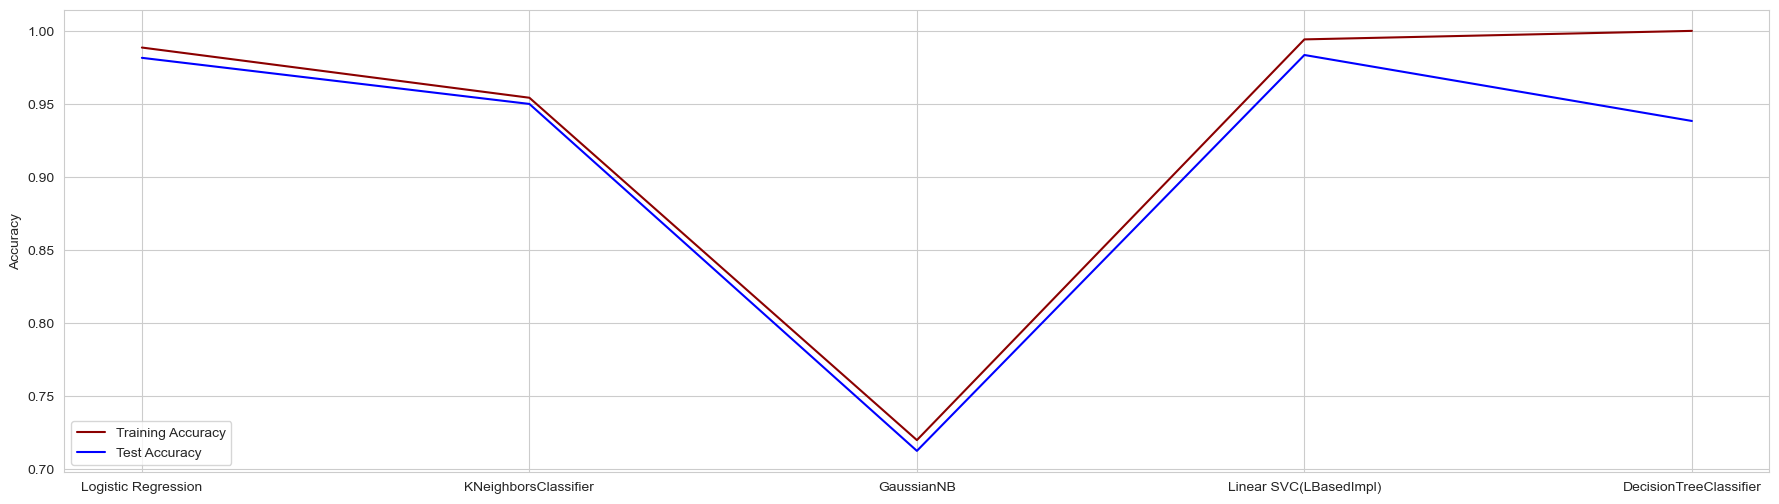

In [25]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()